In [1]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Diabetes.xlsx')

# Printing the dataswet shape
print ("Dataset Length: ", len(df))
print ("Dataset Shape: ", df.shape)

# Printing the dataset obseravtions
print ("Dataset: ",df.head())

Dataset Length:  729
Dataset Shape:  (729, 6)
Dataset:     Pregnancies  Glucose  BloodPressure  Insulin  Age  Outcome
0            6      148             72        0   50        1
1            1       85             66        0   31        0
2            8      183             64        0   32        1
3            1       89             66       94   21        0
4            0      137             40      168   33        1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age', 'Outcome'], dtype='object')

In [4]:
# Separating the target variable
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age']].values
Y = df.Outcome.values

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [5]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [6]:
df.Outcome.unique()

array([1, 0])

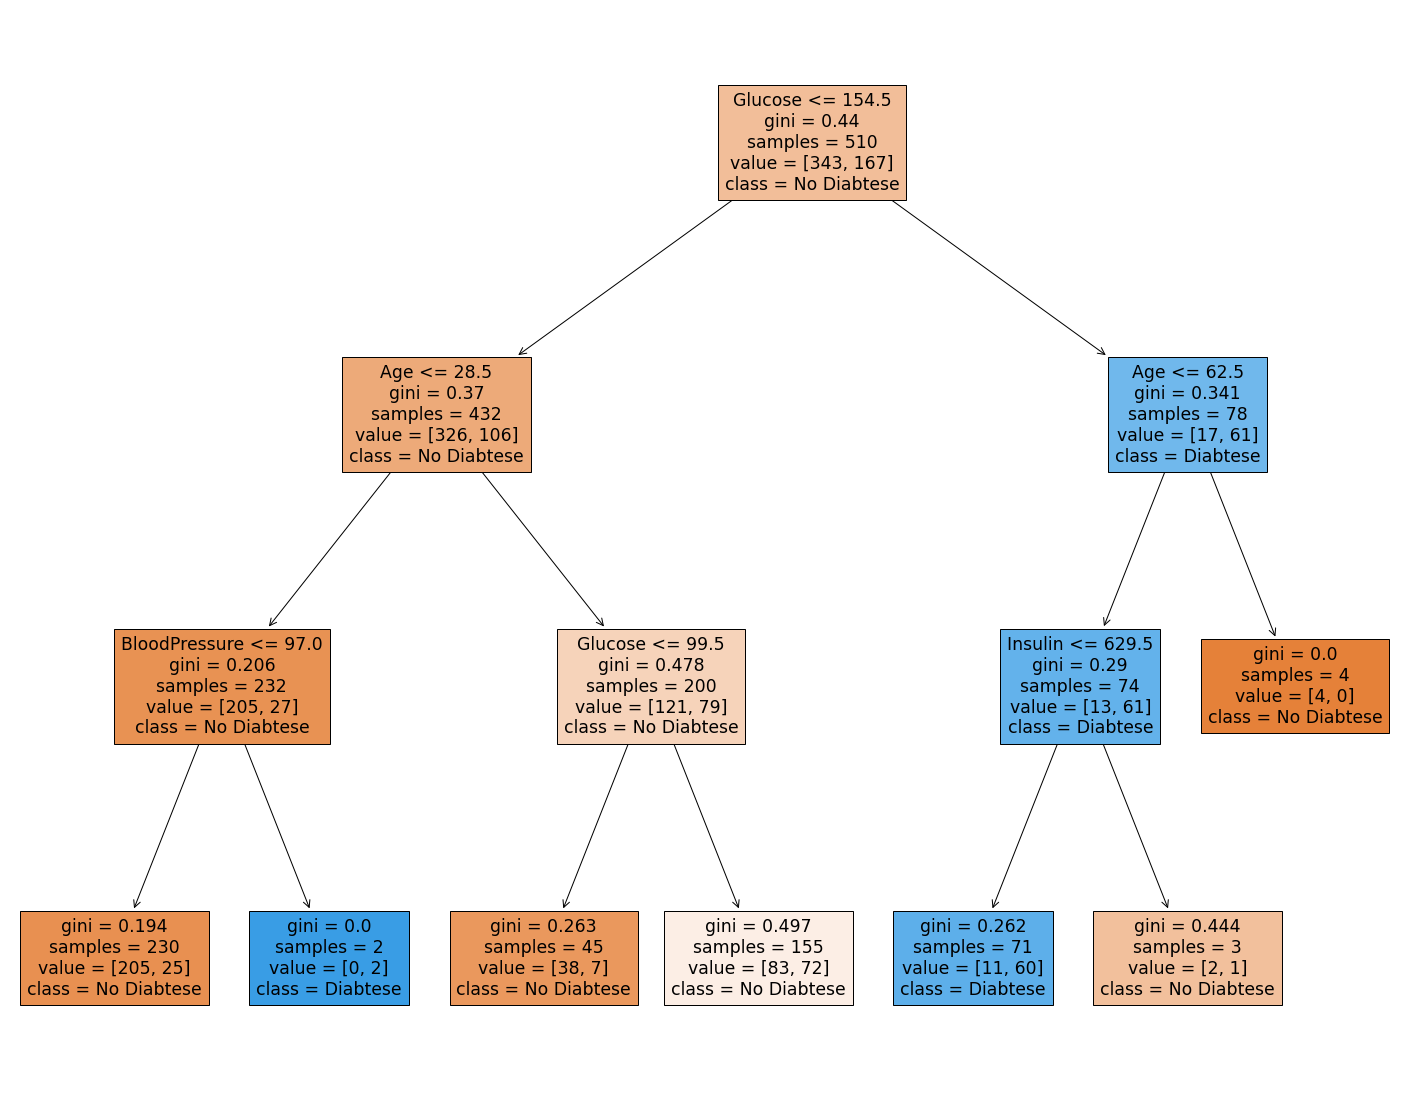

In [7]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age'],
                    class_names=['No Diabtese', "Diabtese"],
                   filled=True)

In [8]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [9]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7725490196078432


array([[332,  11],
       [105,  62]])

In [10]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                    feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age'],
                   class_names=['No Diabtese', "Diabtese"],
                       filled=True)

In [11]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [14]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [15]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 91.3 ms, sys: 95.9 ms, total: 187 ms
Wall time: 1.22 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [16]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001080,0.000046,0.000266,0.000009,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.726562,0.664062,0.748031,0.763780,0.725609,0.037910,32
1,0.001006,0.000022,0.000241,0.000015,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.742188,0.664062,0.748031,0.763780,0.729515,0.038606,27
2,0.000468,0.000093,0.000180,0.000021,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.742188,0.664062,0.748031,0.771654,0.731484,0.040459,18
3,0.000488,0.000059,0.000184,0.000012,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.742188,0.765625,0.748031,0.771654,0.756874,0.012134,1
4,0.000472,0.000079,0.000182,0.000012,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.710938,0.664062,0.740157,0.779528,0.723671,0.042152,37


In [17]:
score_df.nlargest(5,"mean_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000488,0.000059,0.000184,0.000012,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.742188,0.765625,0.748031,0.771654,0.756874,0.012134,1
28,0.000458,0.000123,0.000170,0.000034,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.742188,0.765625,0.748031,0.771654,0.756874,0.012134,1
13,0.000489,0.000095,0.000180,0.000025,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.671875,0.765625,0.748031,0.834646,0.755044,0.057911,3
18,0.000490,0.000096,0.000181,0.000021,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.671875,0.765625,0.748031,0.834646,0.755044,0.057911,3
23,0.000449,0.000078,0.000160,0.000019,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.671875,0.765625,0.748031,0.834646,0.755044,0.057911,3


In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

In [19]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

In [20]:
evaluate_model(dt_best)

Train Accuracy : 0.7588235294117647
Train Confusion Matrix:
[[326  17]
 [106  61]]
--------------------------------------------------
Test Accuracy : 0.7397260273972602
Test Confusion Matrix:
[[128   7]
 [ 50  34]]


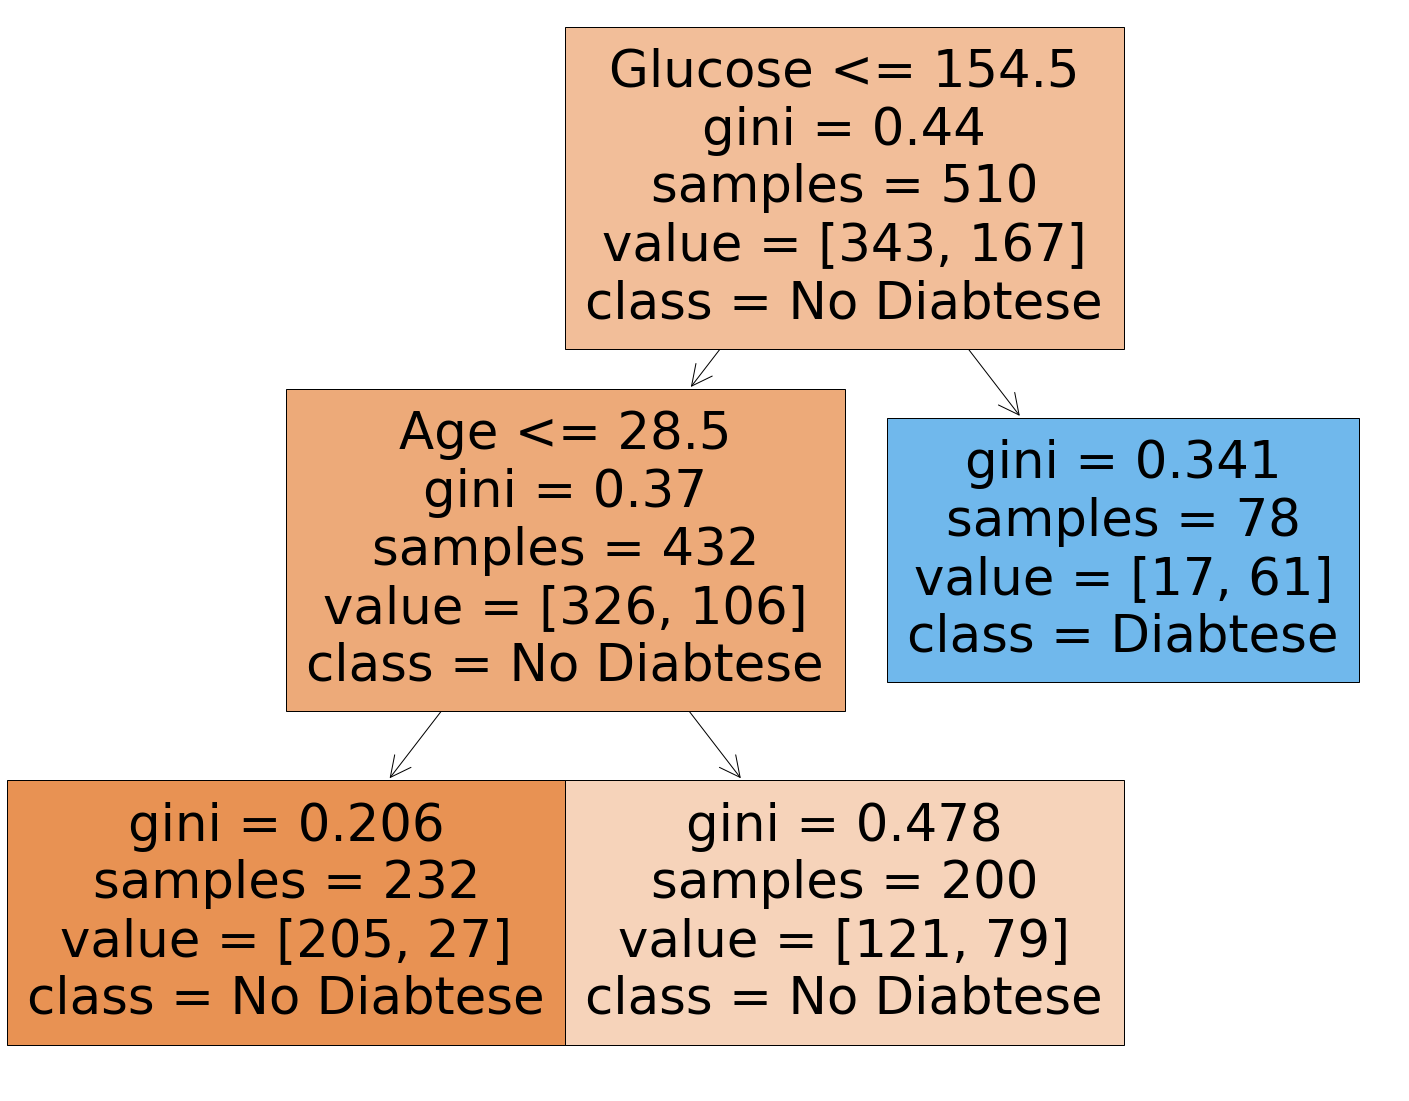

In [21]:
get_dt_graph(dt_best)

In [22]:
from sklearn.tree import export_text

In [23]:
tree_rules = export_text(dt_best, feature_names=list(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age']))

In [24]:
print(tree_rules)

|--- Glucose <= 154.50
|   |--- Age <= 28.50
|   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- class: 0
|--- Glucose >  154.50
|   |--- class: 1

